# Section 1.2 — Data in practice

This notebook contains all the code from [Section 1.2 Data in practice](https://minireference.com/static/excerpts/noBSstats/noBSstats_ch01_DATA.pdf#page=34) of the **No Bullshit Guide to Statistics**.

In [1]:
2 + 3

5

#### Notebook setup

In [2]:
# TODO: only keep this cell in figures notebook
# load Python modules
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from plot_helpers import savefigure

In [3]:
# TODO: only keep this cell in figures notebook
# Figures setup
plt.clf()  # needed otherwise `sns.set_theme` doesn't work
from plot_helpers import RCPARAMS
# RCPARAMS.update({'figure.figsize': (10, 3)})   # good for screen
RCPARAMS.update({'figure.figsize': (5, 1.6)})  # good for print
sns.set_theme(
    context="paper",
    style="whitegrid",
    palette="colorblind",
    rc=RCPARAMS,
)

# Useful colors
snspal = sns.color_palette()
blue, orange, purple = snspal[0], snspal[1], snspal[4]
# red = sns.color_palette("tab10")[3]

# High-resolution please
%config InlineBackend.figure_format = 'retina'

# Where to store figures
DESTDIR = "figures/data"

<Figure size 640x480 with 0 Axes>

### Note for Windows users

If you're on macOS or Linux you can ignore this section—skip to the next section **Data management with Pandas**.

File paths on Windows use the backslash character (`\`) as path separator,
while UNIX operating systems like Linux and macOS use forward slash separator `/` as path separator. 

If you you're on Windows you'll need to manually edit the code examples below to make them work by replacing all occurrences of "`/`" with "`\\`". The double backslash is required to get a literal backslash because the character `\` has special meaning as an escape character.

In [4]:
import os

if os.path.sep == "/":
    print("You're on a UNIX system (Linux or macOS).")
    print("Enjoy civilization!")
elif os.path.sep == "\\":
    print("You're on Windows so you should use \\ as path separator.")
    print("Replace any occurence of / (forward slash) in paths with \\\\ (double-backslash).")

You're on a UNIX system (Linux or macOS).
Enjoy civilization!


The current working directory is a path on your computer where this notebook is running.
The code cell below shows you can **get** you **c**urrent **w**orking **d**irectory.

In [5]:
os.getcwd()

'/Users/ivan/Projects/Minireference/STATSbook/noBSstatsnotebooks/notebooks'

You're in the `notebooks/` directory, which is inside the parent directory `noBSstats/`.

The datasets we'll be using in this notebook are located in the `datasets/` directory, which is sibling of the `notebooks/` directory, inside the parent `noBSstats/`. To access data file `minimal.csv` in the `datasets/` directory from the current directory, we must specify a path that includes the `..` directive (go to parent), then go into the `datasets` directory, then open the file `minimal.csv`.

This combination of "directions" for getting to the file will look different if you're on a Windows system or on a UNIX system. The code below shows the correct path you should access.

In [6]:
if os.path.sep == "/":
    # UNIX path separators
    path = "../datasets/players.csv"
else:
    # Windows path separators
    path = "..\\datasets\\players.csv"

print("The path to the file players.csv in the datasets/ directory is")
path

The path to the file players.csv in the datasets/ directory is


'../datasets/players.csv'

All the code examples provided below assume you're on a UNIX system,
hence the need to manually modify them to use double-backslashes in path strings for the code to work.

## Getting started with JupyterLab

### Download and install JupyterLab Desktop
Follow instructions in the [Python tutorial](./python_tutorial.ipynb) to install JupyterLab Desktop on your computer.

### Download the `noBSstats` notebooks and datasets

### Install requirements

In [7]:
# %pip install -r ../requirements.txt

### Datasets for the book

In [8]:
! ls -1 ../datasets/*csv

../datasets/apples.csv
../datasets/doctors.csv
../datasets/eprices.csv
../datasets/epriceswide.csv
../datasets/kombucha.csv
../datasets/kombuchapop.csv
../datasets/minimal.csv
../datasets/players.csv
../datasets/players_full.csv
../datasets/students.csv
../datasets/visitors.csv


### Interactive notebooks for each section

In [9]:
!ls ../notebooks/*ipynb

../notebooks/11_intro_to_data.ipynb
../notebooks/12_data_in_practice.ipynb
../notebooks/13_descriptive_statistics.ipynb
../notebooks/21_discrete_random_vars.ipynb
../notebooks/22_multiple_random_vars.ipynb
../notebooks/23_inventory_discrete_dists.ipynb
../notebooks/24_calculus_prerequisites.ipynb
../notebooks/25_continuous_random_vars.ipynb
../notebooks/26_inventory_continuous_dists.ipynb
../notebooks/27_random_var_generation.ipynb
../notebooks/28_random_samples.ipynb
../notebooks/31_estimators.ipynb
../notebooks/32_confidence_intervals.ipynb
../notebooks/33_intro_to_NHST.ipynb
../notebooks/34_analytical_approx.ipynb
../notebooks/35_two_sample_tests.ipynb
../notebooks/36_design.ipynb
../notebooks/37_inventory_stats_tests.ipynb
../notebooks/41_introduction_to_LMs.ipynb
../notebooks/99_mean_estimation_details.ipynb
../notebooks/99_proportions_estimators.ipynb
../notebooks/OLD34_analytical_approximation.ipynb
../notebooks/cut_material.ipynb
../notebooks/one_sample_known_mean_unknown_var.i

### Exercises notebooks

In [10]:
!ls ../exercises/*ipynb

../exercises/exercises_12_practical_data.ipynb
../exercises/exercises_13_descr_stats.ipynb
../exercises/exercises_21_discrete_RVs.ipynb
../exercises/exercises_31_estimtors.ipynb
../exercises/exercises_32_confidence_intervals.ipynb
../exercises/exercises_33_intro_to_NHST.ipynb
../exercises/exercises_35_two_sample_tests.ipynb
../exercises/problems_1_data.ipynb


#### Players dataset

In [11]:
import pandas as pd
players = pd.read_csv("../datasets/players.csv")

In [12]:
players.head()

,username,country,age,ezlvl,time,points,finished
0,mary,us,38,0,124.94,418,0
1,jane,ca,21,0,331.64,1149,1
2,emil,fr,52,1,324.61,1321,1
3,ivan,ca,50,1,39.51,226,0
4,hasan,tr,26,1,253.19,815,0


## Data management with Pandas

The first step is to import the Pandas library.
We'll follow the standard convention of importing the `pandas` module under the alias `pd`.

In [13]:
import pandas as pd

If you get an error when running this code cell,
make sure you go back to the above step and run `%pip install -r ../requirements.txt`.
Alternatively,
you can run `%pip install pandas` to install just the Pandas library.

### Data frames

Loading the dataset `minimal.csv`

In [14]:
# !cat "../datasets/players.csv"

In [15]:
players = pd.read_csv("../datasets/players.csv")
players

,username,country,age,ezlvl,time,points,finished
0,mary,us,38,0,124.94,418,0
1,jane,ca,21,0,331.64,1149,1
2,emil,fr,52,1,324.61,1321,1
3,ivan,ca,50,1,39.51,226,0
4,hasan,tr,26,1,253.19,815,0
5,jordan,us,45,0,28.49,206,0
6,sanjay,ca,27,1,350.00,1401,1
7,lena,uk,23,0,408.76,1745,1
8,shuo,cn,24,1,194.77,1043,0
9,r0byn,us,59,0,255.55,1102,0


In [16]:
# ALT.
filepath = os.path.join("..", "datasets", "players.csv")
players = pd.read_csv(filepath)

### Data frame properties

In [17]:
type(players)

pandas.core.frame.DataFrame

In [18]:
players.index

RangeIndex(start=0, stop=12, step=1)

In [19]:
players.columns

Index(['username', 'country', 'age', 'ezlvl', 'time', 'points', 'finished'], dtype='object')

In [20]:
players.shape

(12, 7)

In [21]:
players.dtypes

username     object
country      object
age           int64
ezlvl         int64
time        float64
points        int64
finished      int64
dtype: object

In [22]:
players.head(3)
# players.tail(2)
# players.sample(3)

,username,country,age,ezlvl,time,points,finished
0,mary,us,38,0,124.94,418,0
1,jane,ca,21,0,331.64,1149,1
2,emil,fr,52,1,324.61,1321,1


In [23]:
players.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   username  12 non-null     object 
 1   country   12 non-null     object 
 2   age       12 non-null     int64  
 3   ezlvl     12 non-null     int64  
 4   time      12 non-null     float64
 5   points    12 non-null     int64  
 6   finished  12 non-null     int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 2.0 KB


In [24]:
# players.axes
# players.memory_usage()
# players.values

### Accessing values in a DataFrame

#### Selecting individual values

In [25]:
# Emil's points
players.loc[2,"points"]

1321

#### Selecting entire rows

In [26]:
# Sanjay's data
row6 = players.loc[6,:]  # == players.loc[6]
row6

username    sanjay
country         ca
age             27
ezlvl            1
time         350.0
points        1401
finished         1
Name: 6, dtype: object

In [27]:
# Rows of the dataframe are Series objects
type(row6)

pandas.core.series.Series

The `index` of the series `row6` is the same as the columns index of the data frame `players`.

In [28]:
row6.index

Index(['username', 'country', 'age', 'ezlvl', 'time', 'points', 'finished'], dtype='object')

To access individual values, use the square bracket notation.

In [29]:
row6["age"]

27

#### Selecting entire columns

In [30]:
ages = players["age"]
ages

0     38
1     21
2     52
3     50
4     26
5     45
6     27
7     23
8     24
9     59
10    18
11    22
Name: age, dtype: int64

In [31]:
type(ages)

pandas.core.series.Series

In [32]:
ages.index

RangeIndex(start=0, stop=12, step=1)

In [33]:
ages.values

array([38, 21, 52, 50, 26, 45, 27, 23, 24, 59, 18, 22])

In [34]:
# ALT1.
# players["age"].equals( players.loc[:,"age"] )

In [35]:
# ALT2.
# players["age"].equals( players.age )

In [36]:
ages[6]

27

#### Selecting multiple columns

In [37]:
players[["username", "country"]]

,username,country
0,mary,us
1,jane,ca
2,emil,fr
3,ivan,ca
4,hasan,tr
5,jordan,us
6,sanjay,ca
7,lena,uk
8,shuo,cn
9,r0byn,us


#### Selecting subsets of the data frame

We rarely need to do this,
but for the purpose of illustration of the `loc` syntax,
here is the code for selecting the `time` and `points` columns
from the last three rows of the `players` data frame.

In [38]:
players.loc[9:12, ["time","points"]]

,time,points
9,255.55,1102
10,303.66,1209
11,381.97,1491


### Statistical calculations using Pandas

In [39]:
ages = players["age"]  # == players.loc[:,"age"]
ages

0     38
1     21
2     52
3     50
4     26
5     45
6     27
7     23
8     24
9     59
10    18
11    22
Name: age, dtype: int64

In [40]:
type(ages)

pandas.core.series.Series

In [41]:
ages.index

RangeIndex(start=0, stop=12, step=1)

In [42]:
ages.name

'age'

In [43]:
players.loc[6]

username    sanjay
country         ca
age             27
ezlvl            1
time         350.0
points        1401
finished         1
Name: 6, dtype: object

#### Series methods

In [44]:
ages.count()

12

In [45]:
# # ALT
# len(ages)

In [46]:
ages.sum()

405

In [47]:
ages.sum() / ages.count()

33.75

In [48]:
ages.mean()

33.75

In [49]:
ages.std()

14.28365244861157

### Selecting only certain rows (filtering)


To select only rows where `ezlvl` is `1`, we first build the boolean selection mask...

In [50]:
mask = players["ezlvl"] == 1
mask

0     False
1     False
2      True
3      True
4      True
5     False
6      True
7     False
8      True
9     False
10    False
11     True
Name: ezlvl, dtype: bool

... then select the rows using the mask.

In [51]:
print(players[mask])

   username country  age  ezlvl    time  points  finished
2      emil      fr   52      1  324.61    1321         1
3      ivan      ca   50      1   39.51     226         0
4     hasan      tr   26      1  253.19     815         0
6    sanjay      ca   27      1  350.00    1401         1
8      shuo      cn   24      1  194.77    1043         0
11     joro      bg   22      1  381.97    1491         1


The above two step process can be combined into a more compact expression:

In [52]:
players[players["ezlvl"]==1]

,username,country,age,ezlvl,time,points,finished
2,emil,fr,52,1,324.61,1321,1
3,ivan,ca,50,1,39.51,226,0
4,hasan,tr,26,1,253.19,815,0
6,sanjay,ca,27,1,350.00,1401,1
8,shuo,cn,24,1,194.77,1043,0
11,joro,bg,22,1,381.97,1491,1


In [53]:
# BONUS. mask for selecting players with ezlvl=1 and time greater than 200 mins
# players[(players["ezlvl"] == 1) & (players["time"] >= 200)]

In [54]:
# BONUS. mask for selecting USA and Canada players
# players["country"].isin(["us","ca"])

### Sorting data frames and ranking

In [55]:
players.sort_values("time")

,username,country,age,ezlvl,time,points,finished
5,jordan,us,45,0,28.49,206,0
3,ivan,ca,50,1,39.51,226,0
0,mary,us,38,0,124.94,418,0
8,shuo,cn,24,1,194.77,1043,0
4,hasan,tr,26,1,253.19,815,0
9,r0byn,us,59,0,255.55,1102,0
10,anna,pl,18,0,303.66,1209,1
2,emil,fr,52,1,324.61,1321,1
1,jane,ca,21,0,331.64,1149,1
6,sanjay,ca,27,1,350.00,1401,1


In [56]:
players["time"].rank()

0      3.0
1      9.0
2      8.0
3      2.0
4      5.0
5      1.0
6     10.0
7     12.0
8      4.0
9      6.0
10     7.0
11    11.0
Name: time, dtype: float64

### Grouping and aggregation

In [57]:
players.groupby("ezlvl")

In [58]:
players.groupby("ezlvl")["time"]

In [59]:
players.groupby("ezlvl")["time"].mean()

ezlvl
0    242.173333
1    257.341667
Name: time, dtype: float64

In [60]:
print(players.groupby("ezlvl")["time"].aggregate(["sum", "mean"]))

           sum        mean
ezlvl                     
0      1453.04  242.173333
1      1544.05  257.341667


In [61]:
players.groupby("ezlvl")["time"] \
  .agg(["sum", "mean"])

,sum,mean
ezlvl,,
0,1453.04,242.173333
1,1544.05,257.341667


In [62]:
(players
  .groupby("ezlvl")["time"]
  .agg(["sum", "mean", "max"])
)

,sum,mean,max
ezlvl,,,
0,1453.04,242.173333,408.76
1,1544.05,257.341667,381.97


## Data visualization with Seaborn

The first step is to import the `seaboarn` module
under the alias `sns`.

In [63]:
import seaborn as sns

If you get an error when running this code cell,
make sure you go back to the above step and run `%pip install -r ../requirements.txt`.
Alternatively,
you can run `%pip install seaborn` to install just the Seaborn library.

<Axes: xlabel='time'>

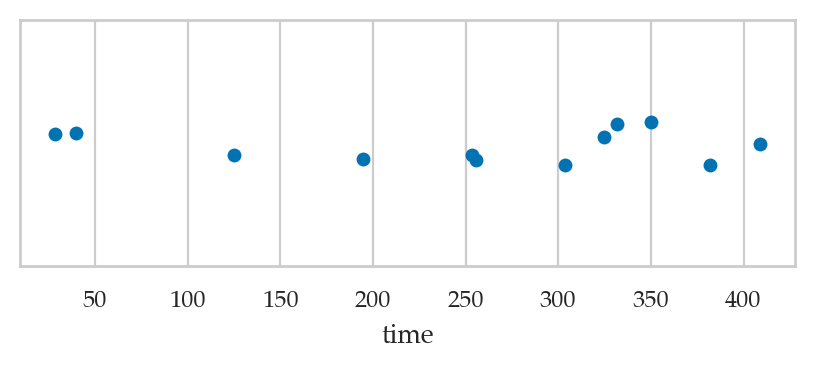

In [64]:
# sns.stripplot(x="time", hue="ezlvl", jitter=0.01, data=players)
sns.stripplot(x="time", data=players)

<Axes: xlabel='time'>

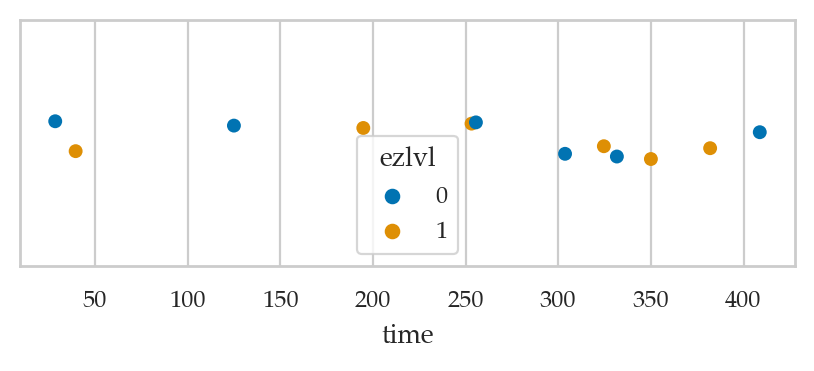

In [65]:
sns.stripplot(x="time", hue="ezlvl", data=players)

Saved figure to figures/data/players-striplot-time-and-time-hue-ezlvl.pdf
Saved figure to figures/data/players-striplot-time-and-time-hue-ezlvl.png


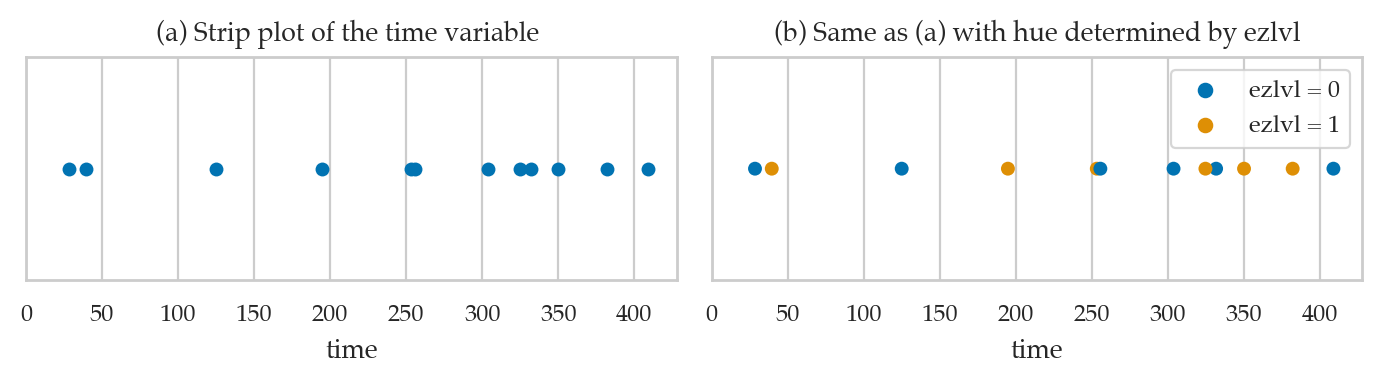

In [66]:
# figures only
filename = os.path.join(DESTDIR, "players-striplot-time-and-time-hue-ezlvl.pdf")

with plt.rc_context({"figure.figsize":(7,2.0)}): #, sns.axes_style("ticks"):
    fig, (ax1, ax2) = plt.subplots(1, 2)

    # (a)
    sns.stripplot(x="time", data=players, jitter=0, ax=ax1)
    ax1.set_title("(a) Strip plot of the time variable ")
    ax1.set_xticks([0, 50, 100, 150, 200, 250, 300, 350, 400])

    # (b)
    sns.stripplot(x="time", hue="ezlvl", data=players, jitter=0, ax=ax2)
    ax2.set_title("(b) Same as (a) with hue determined by ezlvl")
    ax2.set_xticks([0, 50, 100, 150, 200, 250, 300, 350, 400])
    # set lengend
    leg2 = ax2.get_legend()
    handles_dict = {handle.get_label(): handle for handle in leg2.legend_handles}
    handles = []
    for label_index in ["0", "1"]:
        handles.append(handles_dict[label_index])
    labels = ["ezlvl = 0", "ezlvl = 1"]
    ax2.legend(handles, labels)

savefigure(fig, filename)

### Studying the effect of `ezlvl` on `time`

The players dataset was collected as part of an experiment
designed to answer the question "Does the easy first level lead to an improvement in user retention?"
We want to compare the `time` variable (total time players spent in the game)
of players who were shown the "easy level" version of the game (`ezlvl==1`)
to the control group of played who played the regular vesion of the game (`ezlvl==0`).

In [67]:
players.groupby("ezlvl")["time"].mean()

ezlvl
0    242.173333
1    257.341667
Name: time, dtype: float64

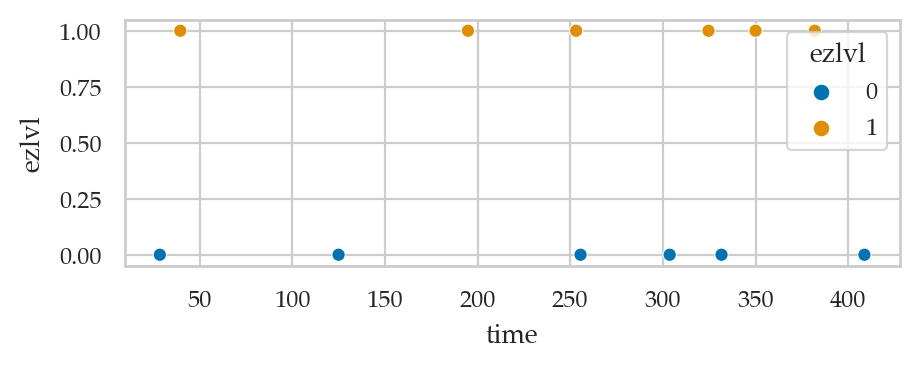

In [68]:
ax = sns.scatterplot(x="time", y="ezlvl", hue="ezlvl", data=players)

<Axes: xlabel='time', ylabel='ezlvl'>

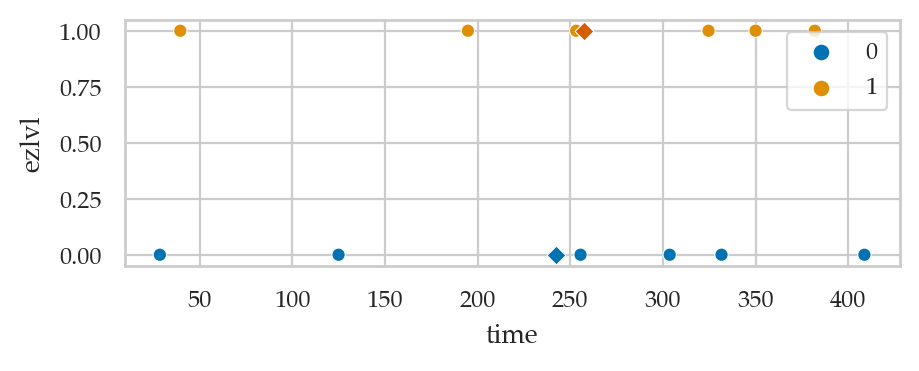

In [69]:
means = players.groupby("ezlvl")["time"].mean()

ax = sns.scatterplot(x="time", y="ezlvl", hue="ezlvl", data=players)
sns.scatterplot(x=[means[1]], y=[1], marker="D", color="r", ax=ax)
sns.scatterplot(x=[means[0]], y=[0], marker="D", color="b", ax=ax)

Saved figure to figures/data/players-scatterplot-x-time-y-ezlvl-with-means.pdf
Saved figure to figures/data/players-scatterplot-x-time-y-ezlvl-with-means.png


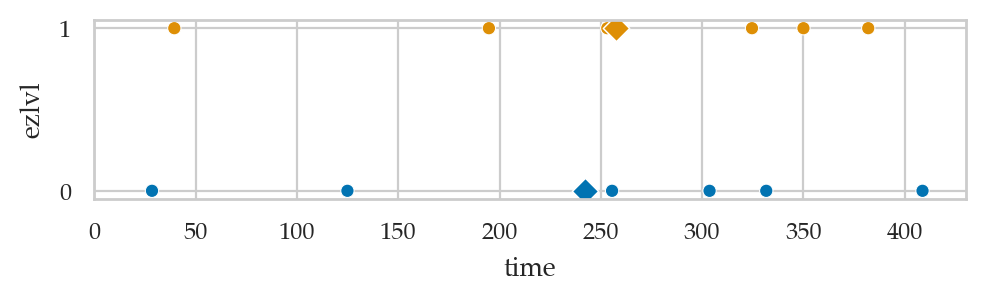

In [70]:
# figures only
filename = os.path.join(DESTDIR, "players-scatterplot-x-time-y-ezlvl-with-means.pdf")

means = players.groupby("ezlvl")["time"].mean()


ax = sns.scatterplot(x="time", y="ezlvl", hue="ezlvl", data=players)
sns.scatterplot(x=[means[0]], y=[0], marker="D", s=45, color=blue,   ax=ax)
sns.scatterplot(x=[means[1]], y=[1], marker="D", s=45, color=orange, ax=ax)
ax.get_legend().remove()
ax.set_xlim([0,430])
ax.set_yticks([0,1])
ax.set_yticklabels([0,1])

savefigure(ax, filename)

### Studying the relationship between `age` and `time`

The secondary research question,
is to look for a correlation between the `age` variable and the `time` variable.

<Axes: xlabel='age', ylabel='time'>

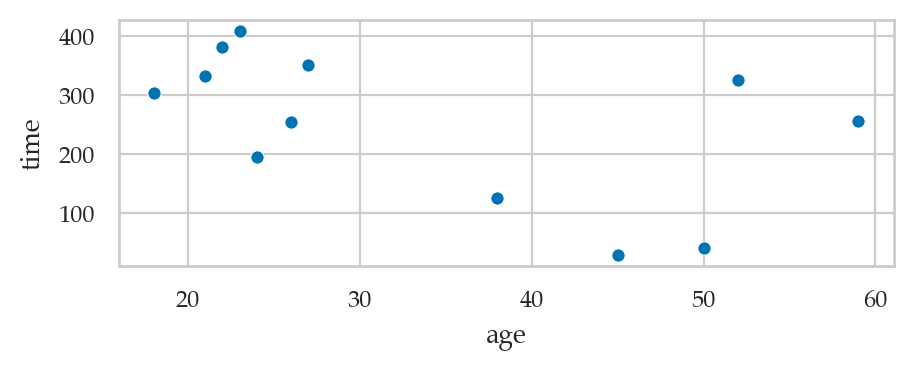

In [71]:
sns.scatterplot(x="age", y="time", data=players)

<Axes: xlabel='age', ylabel='time'>

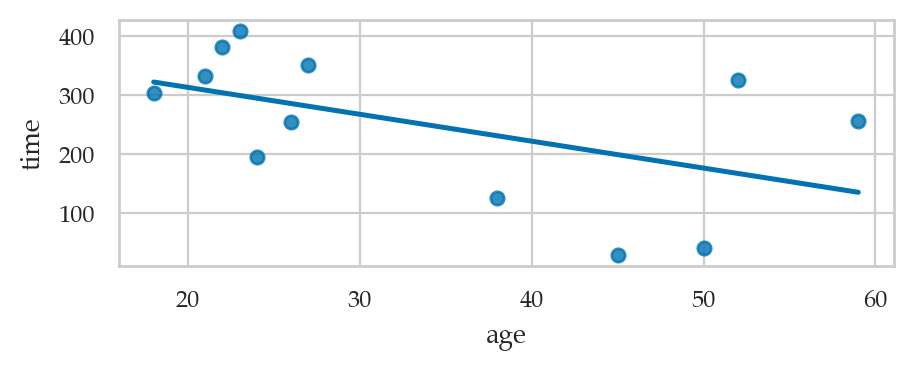

In [72]:
sns.regplot(x="age", y="time", ci=None, data=players)

Saved figure to figures/data/players-time-vs-age-scatterplot-and-regplot.pdf
Saved figure to figures/data/players-time-vs-age-scatterplot-and-regplot.png


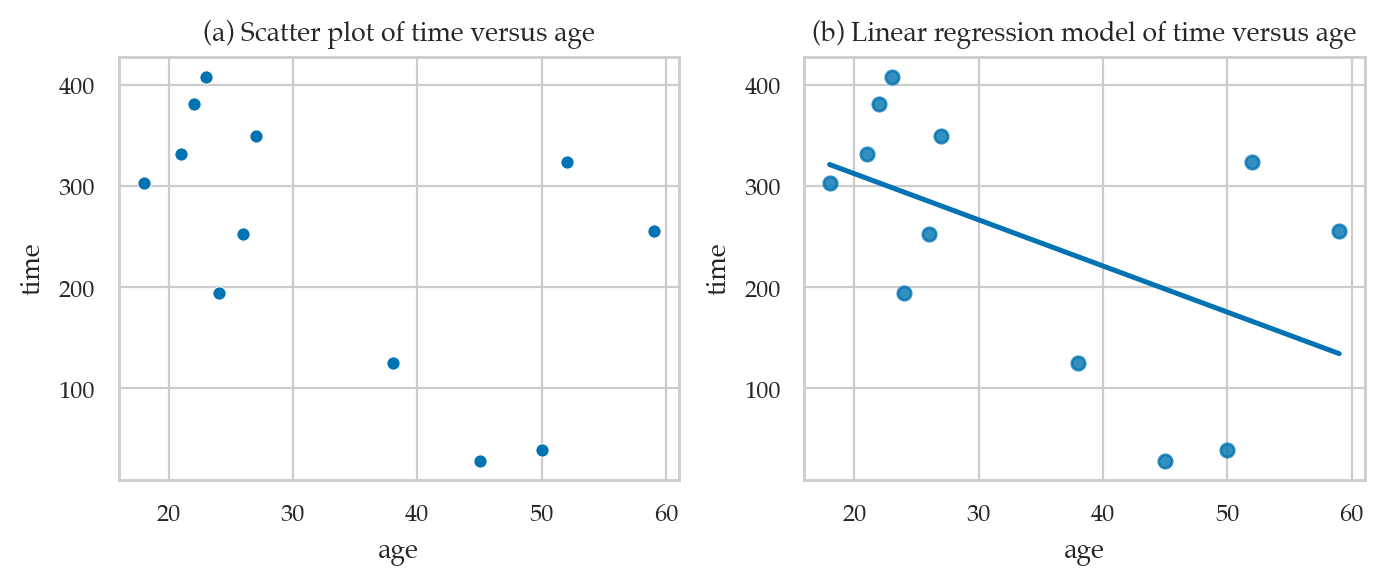

In [73]:
# figures only
filename = os.path.join(DESTDIR, "players-time-vs-age-scatterplot-and-regplot.pdf")

with plt.rc_context({"figure.figsize":(7,3)}): #, sns.axes_style("ticks"):
    fig, (ax1, ax2) = plt.subplots(1, 2)

    # (a)
    sns.scatterplot(x="age", y="time", data=players, ax=ax1)
    ax1.set_title("(a) Scatter plot of time versus age")

    # (b)
    sns.regplot(x="age", y="time", ci=None, data=players, ax=ax2)
    ax2.set_title("(b) Linear regression model of time versus age")

savefigure(fig, filename)

## Real-world datasets

In [74]:
# figures only
datasets_list = [
    {
        "index": "",
        "filename": 'players.csv',
        "sections": "1.1, 1.2",
        "uses": "Intro to Pandas and Seaborn",
     },
    # {
    #     "filename": 'players_full.csv',
    #  },
    {
        "index":1,
        "filename": 'apples.csv',
        "client name": "Alice",
        "sections": "3.1, 3.5",
        "uses": "Estimation",
     },
    {
        "index":2,
        "filename": 'eprices.csv',
        "client name": "Bob",
        "sections": "3.1, 3.5",
        "uses": "Esimtation and hypothesis testing",
     },
    {
        "index":3,
        "filename": 'students.csv',
        "client name": "Charlotte",
        "sections": "1.3, 3.1, 3.5, 4.x",
        "uses": "Descr. stats and hypothesis testing",
    },
    {
        "index":4,
        "filename": 'kombucha.csv',
        "client name": "Khalid",
        "sections": "3.1, 3.2, 3.3, 3.4",
        "uses": "Estimation and hypothesis testing",
     },
    {
        "index":5,
        "filename": 'doctors.csv',
        "client name": "Dan",
        "sections": "3.1, 3.5, 4.x",
        "uses": "Hypothesis testing",
     },
    {
        "index":6,
        "filename": 'visitors.csv',
        "client name": "Vanessa",
        "sections": "3.6",
        "uses": "Test of two proportions",
     },
    {
        "index": "",
        "filename": 'minimal.csv',
        "shape": "5x4",
        "sections": "Appendix D",
        "uses": "Pandas data frame maniulations",
    },
    # {
    #     "filename": 'minimal.csv',
    #     "directory": "datasets/raw/",
    #     "shape": "7x4",
    #     "sections": "Appendix D",
    #     "uses": "Example of with missing values",
    # },
]


# fill in directory
for ds in datasets_list:
    if not "directory" in ds:
        ds["directory"] = "datasets/"


# calculate shape
for ds in datasets_list:
    ds_path = os.path.join("..", ds["directory"], ds["filename"])
    ds_df = pd.read_csv(ds_path)
    ds["shape"] = str(ds_df.shape[0]) + "x" + str(ds_df.shape[1])


datasets_df = pd.DataFrame(datasets_list)
datasets_df = datasets_df[[
    "index",
    "client name",
    "filename",
    "shape",
    "sections",
]]

pd.set_option('display.width', 400)
print(datasets_df.to_latex(index=False))

\begin{tabular}{lllll}
\toprule
index & client name &     filename &  shape &           sections \\
\midrule
      &         NaN &  players.csv &   12x7 &           1.1, 1.2 \\
    1 &       Alice &   apples.csv &   30x1 &           3.1, 3.5 \\
    2 &         Bob &  eprices.csv &   18x2 &           3.1, 3.5 \\
    3 &   Charlotte & students.csv &   15x5 & 1.3, 3.1, 3.5, 4.x \\
    4 &      Khalid & kombucha.csv &  347x2 & 3.1, 3.2, 3.3, 3.4 \\
    5 &         Dan &  doctors.csv &  224x4 &      3.1, 3.5, 4.x \\
    6 &     Vanessa & visitors.csv & 2000x3 &                3.6 \\
      &         NaN &  minimal.csv &    5x4 &         Appendix D \\
\bottomrule
\end{tabular}



/var/folders/wc/2r44j8gs4gn56t1xtw5f6wlm0000gn/T/ipykernel_4166/3480231288.py:94: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(datasets_df.to_latex(index=False))


### Apple weights

### Electricity prices

### Students' scores

### Kombucha volumes

### Doctors' sleep study

### Website visitors